# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
churn = pd.read_csv("./TelcoCustomerChurn.csv", sep=',', decimal='.', header=0)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.shape

(7043, 21)

In [4]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Missing value check

print(f"\nNumber of missing value for each feature:")
churn.isna().sum()


Number of missing value for each feature:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Statistical analysis of all the numerical variables

churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
churn.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7567-ECMCM,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
# Statistical analysis of all the categorical variables

for col in churn.columns[1:len(churn.columns)]:
    if (churn[col].dtype == 'object'):
        print(churn[col].value_counts(), '\n')

Male      3555
Female    3488
Name: gender, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

No                     2810
Yes                    2707
No internet service    15

In [9]:
# Replace missing values with NA values
# then convert it to numerical variable

churn['TotalCharges'] = churn["TotalCharges"].replace(" ", np.nan)

In [10]:
print(f"\n No. fo NA values:")
churn['TotalCharges'].isna().sum()


 No. fo NA values:


11

In [11]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'])

In [12]:
churn['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [13]:
# Replacing NA values with the mean of the column

churn['TotalCharges'].fillna(churn['TotalCharges'].mean(), inplace=True)

In [14]:
print(f"\n No. fo NA values should be zero after replcaing with mean of the column:")
churn['TotalCharges'].isna().sum()


 No. fo NA values should be zero after replcaing with mean of the column:


0

In [15]:
for col in churn.columns:
    if(churn[col].dtype == 'object'):
        # Check for extra whitespaces and remove them
        churn[col] = churn[col].str.strip()
        # Cast text to lower-case
        churn[col] = churn[col].str.lower()

# Data Exploration 

## Univariate Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# plotting all numerical variables

# creating function for Histogram

def BoxHistogramPlot(x):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    sns.boxplot(x, ax=ax_box, color="Red" )
    sns.distplot(x, ax=ax_hist, color="Red")
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

<Figure size 432x288 with 0 Axes>

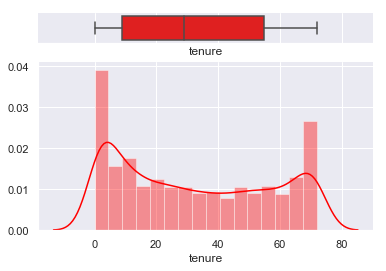

<Figure size 432x288 with 0 Axes>

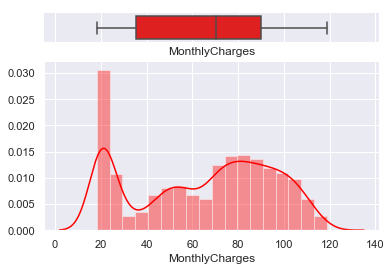

<Figure size 432x288 with 0 Axes>

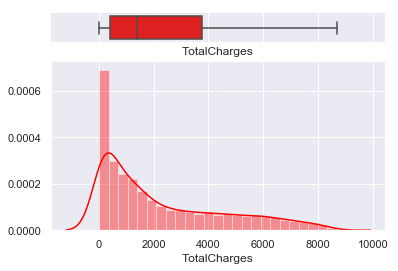

In [37]:
i = 1
for col in churn[['tenure','MonthlyCharges', 'TotalCharges']]:
    plt.suptitle("Figure " + str(i) + ": Histogram and Box Plot of " + col)
    BoxHistogramPlot(churn[col])
    plt.show()
    i = 1 + i

In [19]:
# plotting all categorical variables

# creating function for bar plot

sns.set(color_codes=True)
def BarPlot(x):
    total = float(len(churn))
    ax = churn[x].value_counts(normalize = True).plot(kind = "bar", alpha = 0.5)

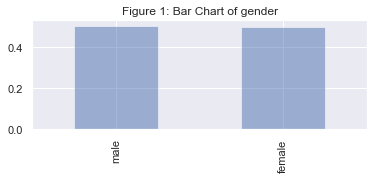

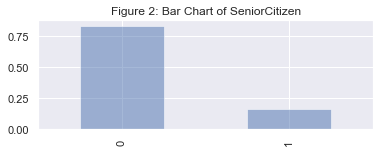

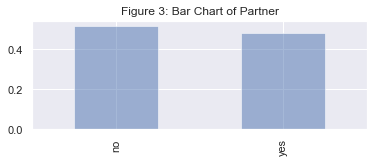

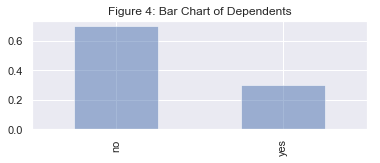

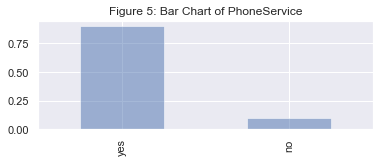

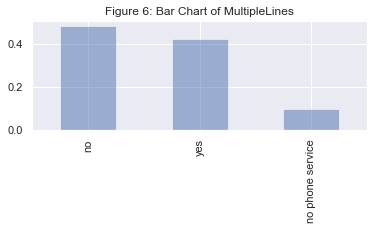

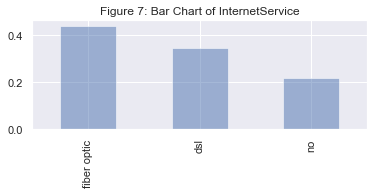

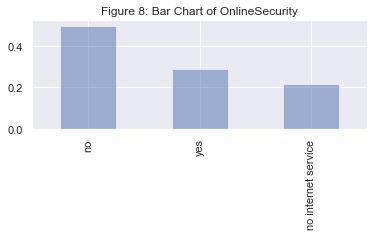

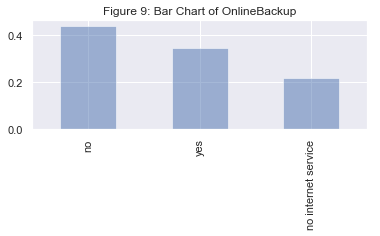

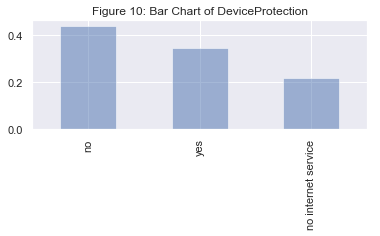

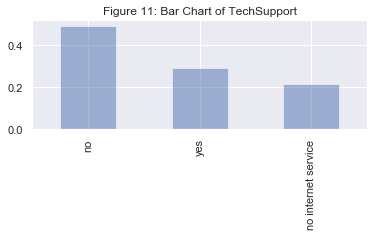

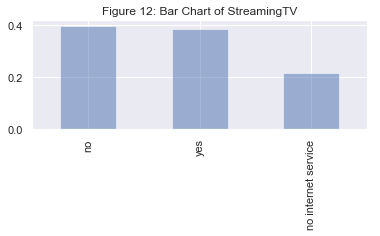

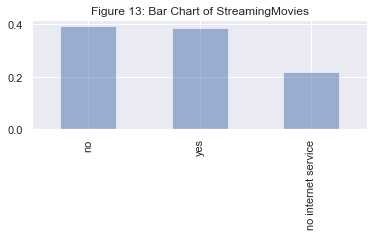

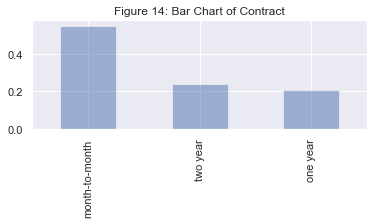

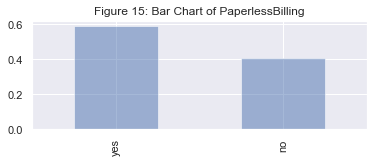

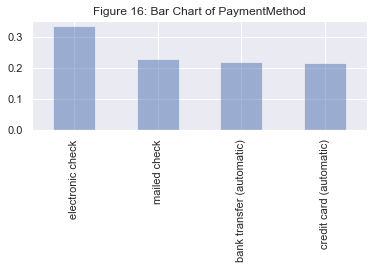

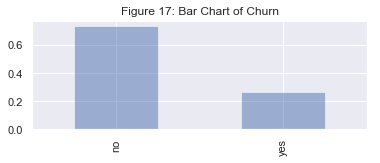

In [20]:
i = 1
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    plt.figure(figsize=(6,2))
    plt.title("Figure " + str(i) + ": Bar Chart of " + col, fontsize = 12)
    BarPlot(col)
    plt.show()
    i = 1 + i

# Multivariate Visualisation

### Histogram of Numeric Features Segregated by Churn

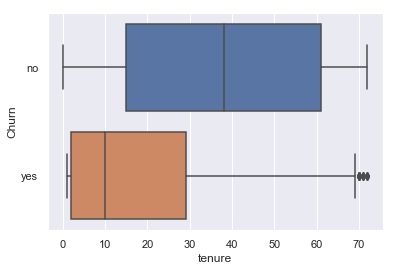

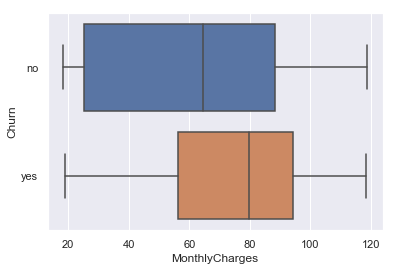

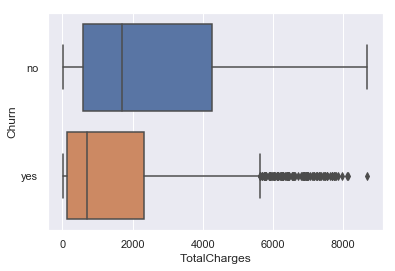

In [21]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    ax = sns.boxplot(x=col, y="Churn", data=churn)
    plt.show()

### Heatmap for Categorical Features Segregated by Churn

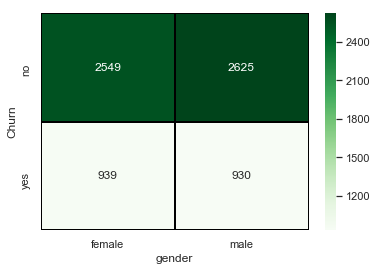

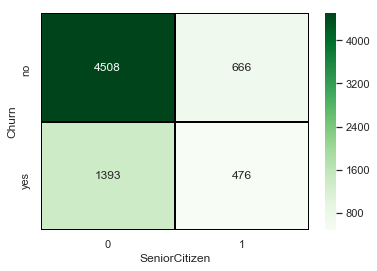

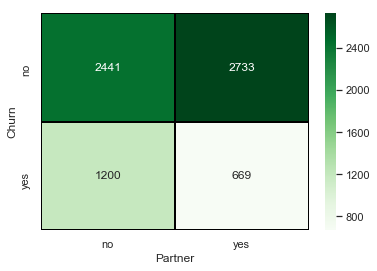

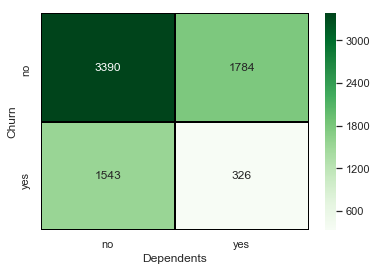

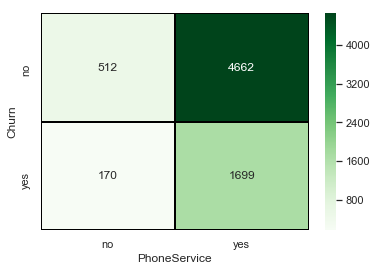

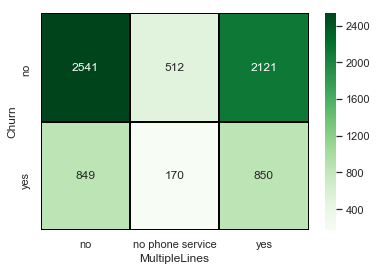

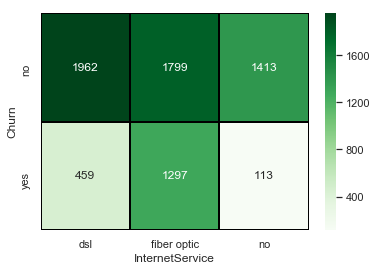

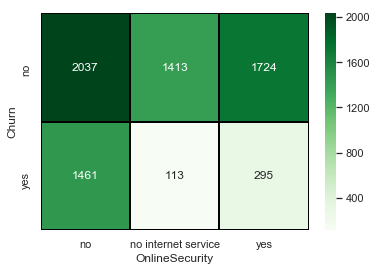

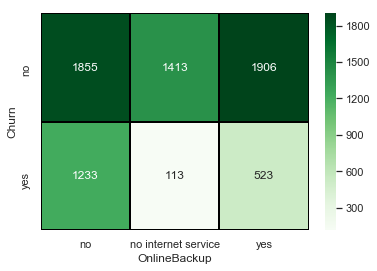

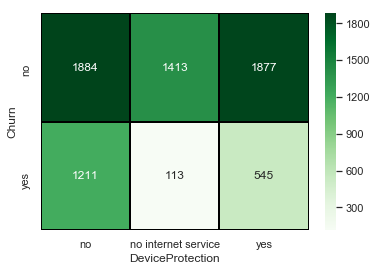

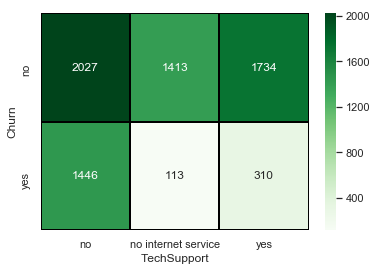

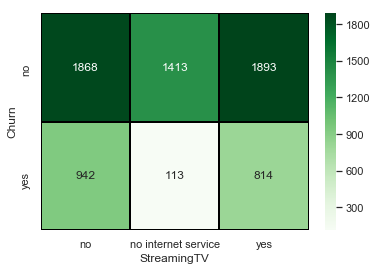

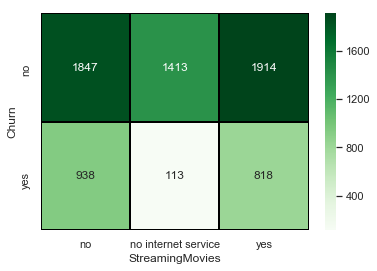

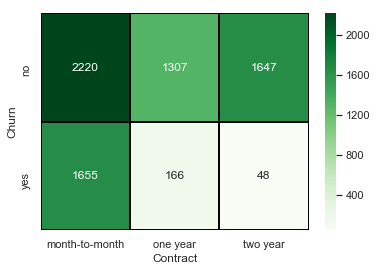

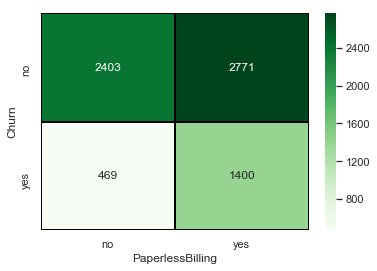

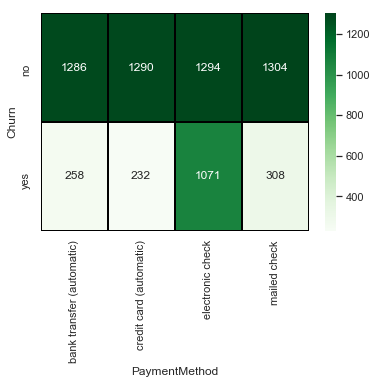

In [38]:
#from statsmodels.graphics.mosaicplot import mosaic
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    a = pd.crosstab(churn['Churn'], churn[col])
    ax = sns.heatmap(a, annot=True, fmt='g', cmap="Greens", linewidths=1, linecolor="black")
    plt.show()